In [1]:
import os, sys
import general_config 
print(general_config.ROOTDIR)
sys.path.append(general_config.ROOTDIR)

import numpy as np
import matplotlib.pyplot as plt
from pipeline.objgen.random_simple_gen_implemented import TenClassesPyIO

D:/Desktop@D/xai_basic


## Preparing data with Pytorch Loader
We have defined <b>TenClassesPyIO</b> class for loading data in a way compatible to pytorch implementation. The method <b>setup_training_0001()</b> is defined to setup dataset for training process, where only the image <i>cimg</i> and the label <i>y0</i> are used. The heatmaps are not used in model training process.<br><br>
<span style="color:red"><b>Note</b>:</span> This is only for illustrating how we pytorch Dataloader and Dataset classes can be used. In practice, we recommend preparing the data in <i>shards</i> and <i>chunks</i> for more efficient just-in-time data loading (see tutorial 3). 

In [2]:
from torch.utils.data import DataLoader

n_epoch = 1
data_per_epoch = 12
batch_size = 4

this_dataset = TenClassesPyIO() # this class is defined by inheriting pytorch Dataset object.
this_dataset.setup_training_0001(general_meta_setting=None, explanation_setting=None, data_size=12)

print('Starting iteration through epochs...')
for epoch in range(n_epoch):
    trainloader = DataLoader(dataset=this_dataset, shuffle=True, batch_size=batch_size)
    print('epoch: %s'%(str(epoch)))
    for i, data in enumerate(trainloader, 0):
        x, y0 = data
        print('  x.shape:',x.clone().detach().numpy().shape, 'y0', y0.clone().detach().numpy())

  data prepared.                                                
Starting iteration through epochs...
epoch: 0
  x.shape: (4, 3, 512, 512) y0 [9 4 0 8]
  x.shape: (4, 3, 512, 512) y0 [3 7 5 3]
  x.shape: (4, 3, 512, 512) y0 [2 5 3 6]


## Batches of Images
In pytorch, the data is prepared in batches. The images are arranged in batches, each image having (C,H,W) shape, where C=3 is the no. of color channels. In the above, for example, batch size is set to 4. Hence, as a whole, the shape is (4,C,H,W). <br><br>
Let us take the latest x from the trainloader we just run and observe it.

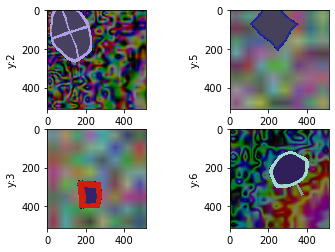

In [3]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
for i in range(batch_size):
    plt.gcf().add_subplot(220+i+1)
    plt.gca().imshow(x.clone().detach().numpy()[i].transpose((1,2,0)))
    plt.gca().set_ylabel('y:'+str(y0.clone().detach().numpy()[i]))

# Preparing data shards or chunks 
In our main workflow, data shards or chunks are prepared using <b>TenClassesPyIO</b>. Besides inheriting <i>Dataset</i> class from pytorch, it also inherits <b>FastPickleClient</b> we defined in utils.utils. FastPickleClient is just a simple class to handle save/load-ing data using pickle. Note: In the training process, shard is loaded one by one for efficiency.<br><br>

In the following, we prepare:
<ul>
    <li> 4 shards of training data, each shard has 12 image-heatmap pairs. Total 48 samples.
    <li> 2 shards of validation data, each shard has 3 image-heatmap pairs. Total 6 samples.
    <li> 2 chunks of evaluation data, each shard has 24 image-heatmap pairs. Total 48 samples.
</ul>
Note: the only difference between shards and chunks is that shards do NOT contain heatmaps, as the training and validation of training accuracies do not require heatmaps. <br><br>
In our actual experiment, we use 32/8/8 shards of training/validation/evaluation data, each containing 200 samples. In other words, there are 6400/1600/1600 samples respectively. 

In [4]:
CONFIG_DATA = {
    'data_cache_name': 'demo_training_data',
    'training_data':{  
        'number_of_data_shards':4,
        'number_of_data_per_shard':12,},    
    'validation_data_cache_name':'demo_val_data',
    'val_data':{
        'number_of_data_shards':2,
        'number_of_data_per_shard':3,},
    'test_data_cache_name':'demo_test_data',
    'test_data':{
        'number_of_data_chunks':2,
        'number_of_data_per_chunk':24,}, 
}

this_dir = 'temp'
if not os.path.exists(this_dir): os.mkdir(this_dir)

The following function <b>get_data()</b> may not have been suitably named. What it actually does are preparing and saving data in shards and chunks.If you re-run this fully or partially, you may see something like <i>shard XXX_data number N already exists</i>. Otherwise, you will see <i>creating XXX_data number N. data prepared.</i>

In [5]:
from pipeline.workflow_utils import get_data
get_data(CONFIG_DATA, this_dir, realtime_update=True)

shard demo_val_data number 1 already exists
shard demo_val_data number 2 already exists
shard demo_training_data number 1 already exists
shard demo_training_data number 2 already exists
shard demo_training_data number 3 already exists
shard demo_training_data number 4 already exists
creating chunk demo_test_data number 1
  data prepared.                                                
creating chunk demo_test_data number 2
  data prepared.                                                


## Data is ready!
Now check your temp folder, there should be a few shards and chunks of data. See tutorial 3 on how to use them.